In [55]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/Exp/Noise/0.2/experiment_vis"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)

ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8666.56it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8517.60it/s]


absolute alignment indicates number: 0 label diff indicates number: 1001 confidence diff indicates number: 657 high distance number: 3730


In [19]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 4799.11it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 4833.08it/s]


In [59]:
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=5,learning_rate=1e-2)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=10)

continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8518.50it/s]


NET resnet18
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7743.33it/s]


Epoch [1/5], Loss: 2.3531, Loss decoder: 0.0007,Loss encoder: 0.0015,flip_loss: 161.09490966796875,pred_loss:0.7351675033569336,loss_contrastive0.0,cka_loss0.004707515239715576


100%|██████████| 3/3 [00:00<00:00, 7681.88it/s]


Epoch [2/5], Loss: 2.4145, Loss decoder: 0.0007,Loss encoder: 0.0015,flip_loss: 165.61026000976562,pred_loss:0.7511748671531677,loss_contrastive0.0,cka_loss0.005013942718505859


100%|██████████| 3/3 [00:00<00:00, 7388.67it/s]


Epoch [3/5], Loss: 2.4943, Loss decoder: 0.0007,Loss encoder: 0.0015,flip_loss: 159.89602661132812,pred_loss:0.6943661570549011,loss_contrastive19.371945709228516,cka_loss0.005011618137359619


100%|██████████| 3/3 [00:00<00:00, 8055.64it/s]


Epoch [4/5], Loss: 2.5171, Loss decoder: 0.0007,Loss encoder: 0.0015,flip_loss: 161.9728546142578,pred_loss:0.6925392746925354,loss_contrastive19.79923747253418,cka_loss0.00466078519821167


100%|██████████| 3/3 [00:00<00:00, 5251.63it/s]


Epoch [5/5], Loss: 2.3266, Loss decoder: 0.0007,Loss encoder: 0.0015,flip_loss: 166.971435546875,pred_loss:0.650112509727478,loss_contrastive0.0,cka_loss0.004537701606750488


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8676.31it/s]


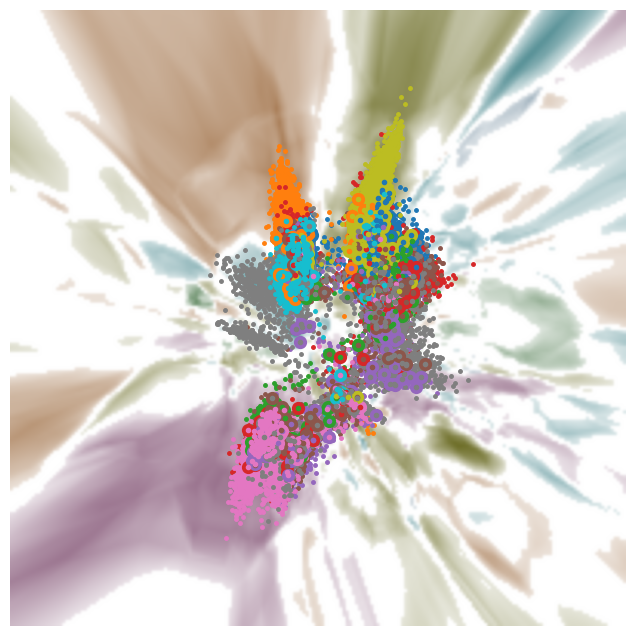

In [56]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [27]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [57]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Thu May 11 15:37:37 2023 Building RP forest with 16 trees
Thu May 11 15:37:37 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 11 15:37:39 2023 Building RP forest with 16 trees
Thu May 11 15:37:39 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.12/15 in epoch 200


1.1224

In [58]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8477.93it/s]

#train# autoencoder PPR: 0.40 in epoch 200


0.40426

In [34]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.9951008034454223


In [38]:
eval.eval_move_direction_preserving(autoencoder,10,2.99)

100%|██████████| 250/250 [00:00<00:00, 4761.73it/s]


long distance move subet number is 18094, short distance move set number is 24


100%|██████████| 250/250 [00:00<00:00, 5789.30it/s]


all reference distance preserving 49409/50000
all target distance preserving 40973/50000
short distance move direction preserving 16/24
long distance move direction preserving 14616/18094


In [39]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 6145.39it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:20213/50000 0.40
ref&tar pred_same preserving:19427/48999 0.40
ref&tar pred_diff preserving:241/1001 0.24


In [54]:
DEVICE="cuda:1"
####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=2000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1)

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8847.92it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:01<00:00, 132.85it/s]


conf1 (4923, 10) (4957, 10) (4923, 10) (4957, 10)
conf1 (4761, 10) (4959, 10) (4761, 10) (4959, 10)
conf1 (4957, 10) (4959, 10) (4957, 10) (4959, 10)
conf1 (4931, 10) (4907, 10) (4931, 10) (4907, 10)
conf1 (4931, 10) (4978, 10) (4931, 10) (4978, 10)
conf1 (4931, 10) (4957, 10) (4931, 10) (4957, 10)
conf1 (4978, 10) (4878, 10) (4978, 10) (4878, 10)
conf1 (4816, 10) (4959, 10) (4816, 10) (4959, 10)
conf1 (4978, 10) (4959, 10) (4978, 10) (4959, 10)
conf1 (4931, 10) (4978, 10) (4931, 10) (4978, 10)
conf1 (4923, 10) (4761, 10) (4923, 10) (4761, 10)
conf1 (4923, 10) (4959, 10) (4923, 10) (4959, 10)
conf1 (4978, 10) (4957, 10) (4978, 10) (4957, 10)
conf1 (4761, 10) (4907, 10) (4761, 10) (4907, 10)
conf1 (4931, 10) (4957, 10) (4931, 10) (4957, 10)
conf1 (4891, 10) (4907, 10) (4891, 10) (4907, 10)
conf1 (4907, 10) (4959, 10) (4907, 10) (4959, 10)
conf1 (4907, 10) (4957, 10) (4907, 10) (4957, 10)
conf1 (4891, 10) (4959, 10) (4891, 10) (4959, 10)
conf1 (4761, 10) (4878, 10) (4761, 10) (4878, 10)


In [42]:
eval.eval_boundary_nn_ref_in_ref(ref_features.cpu().numpy())

#train# boundary preserving: 2.02/15 in epoch 200


2.0249

In [43]:
eval.eval_boundary_nn_autoencoder(tar_features.cpu().numpy(),autoencoder,15)

#train# boundary preserving: 1.49/15 in epoch 200


1.48592

In [44]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features.cpu().numpy())
np.save(location_T, tar_features.cpu().numpy())

In [9]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_b_features = np.load(ref_border_centers_loc).squeeze()

In [10]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [41]:
eval.eval_boundary_nn_ref_in_ref(ref_b_features)

NameError: name 'ref_b_features' is not defined

In [12]:
eval.eval_boundary_nn_autoencoder(tar_b_features,autoencoder,15)

#train# boundary preserving: 0.02/15 in epoch 200


0.0167

In [53]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border_l[i] != tar_border_l[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,tar_features.cpu().numpy(), ref_features.cpu().numpy())      

123


100%|██████████| 5/5 [00:00<00:00, 8511.17it/s]


1000


100%|██████████| 5/5 [00:00<00:00, 10962.63it/s]

boundary sample preserving118/1000
boundary change preserving588/0
